# Criando um modelo de previsão de doenças hepáticas

In [1]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando a base de dados.
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

In [4]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.8,2
535,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.4,1
366,16,Male,0.7,0.2,418,28,35,7.2,4.1,1.3,2
259,42,Male,30.5,14.2,285,65,130,5.2,2.1,0.6,1
144,45,Female,3.5,1.5,189,63,87,5.6,2.9,1.0,1
374,56,Female,0.7,0.1,145,26,23,7.0,4.0,1.3,2
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.1,2
298,31,Female,1.1,0.3,190,26,15,7.9,3.8,0.9,1
549,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.6,1
345,60,Male,2.9,1.3,230,32,44,5.6,2.0,0.5,1


## Análise Exploratória de Dados

In [6]:
# Tipos de Dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Variáveis categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


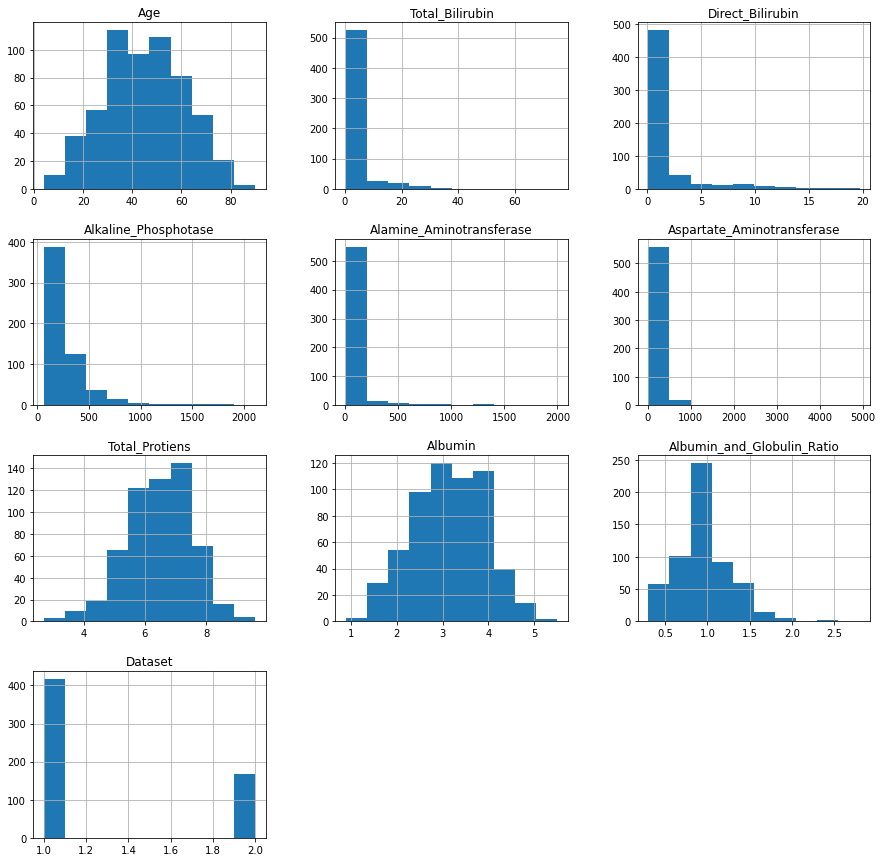

In [10]:
# Plot histograma
dados.hist(figsize = (15,15), bins=10)
plt.show()

In [11]:
# Função para ajustar variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [12]:
# aplicar a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [13]:
# Vamos ajustar o nome da Variável target
dados.rename({'Dataset': 'Target'}, axis = 'columns', inplace = True)

In [14]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
313,30,Female,0.8,0.2,158,25,22,7.9,4.5,1.30,0
419,55,Female,8.2,3.9,1350,52,65,6.7,2.9,0.70,1
283,18,Male,1.3,0.7,316,10,21,6.0,2.1,0.50,0
165,48,Male,4.5,2.3,282,13,74,7.0,2.4,0.52,1
291,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.10,0


In [15]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


## Exploração da Variável Categórica

In [16]:
dados.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo Masculino: 441
Número de pacientes do sexo Feminino: 142


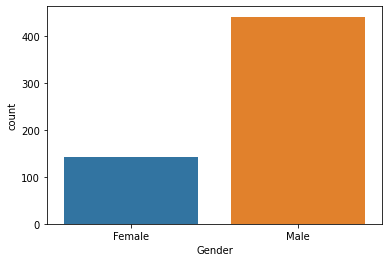

In [17]:
# Plot
sns.countplot(data=dados, x='Gender', label='Count')

# Value Counts
M, F = dados['Gender'].value_counts()

# Print
print(f'Número de pacientes do sexo Masculino: {M}')
print(f'Número de pacientes do sexo Feminino: {F}')

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação do gráficos a seguir.

In [18]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [19]:
dados['Gender'] = dados['Gender'].map(encoding_func)

In [20]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
315,22,0,0.9,0.3,179,18,21,6.7,3.7,1.2,0
530,22,1,1.1,0.3,138,14,21,7.0,3.8,1.1,0
153,52,0,0.6,0.1,178,26,27,6.5,3.6,1.2,0
41,62,0,0.6,0.1,160,42,110,4.9,2.6,1.1,0
582,38,0,1.0,0.3,216,21,24,7.3,4.4,1.5,0


## Verificando a Relação entre Atributos

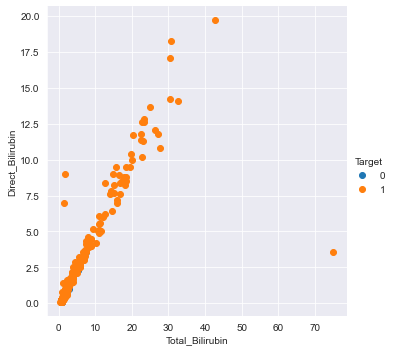

In [21]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid pela variável target.
sns.FacetGrid(dados, hue='Target', size=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


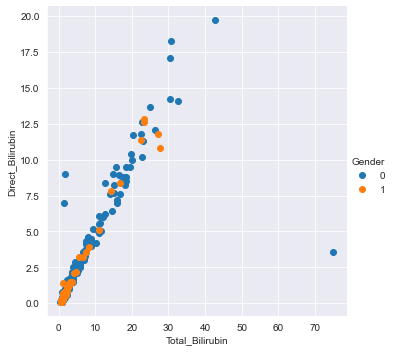

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid pela variável gender.
sns.FacetGrid(dados, hue='Gender', size=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

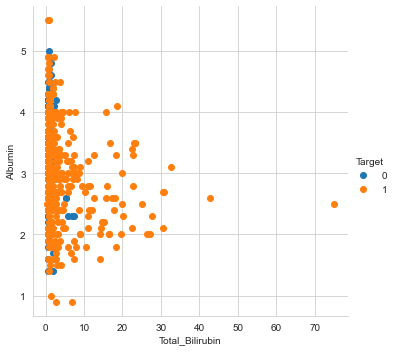

In [23]:
# Define o estilo do background
sns.set_style('whitegrid')

# FacetGrid
sns.FacetGrid(dados, hue='Target', size=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

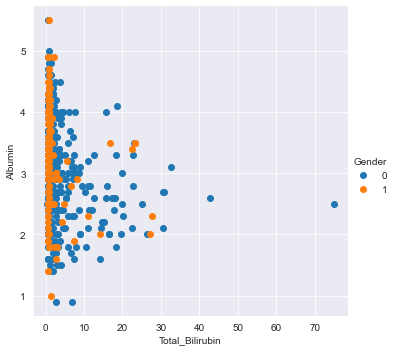

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dados, hue='Gender', size=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

## Verificando Valores Ausentes e Registros Duplicados

In [25]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [26]:
# Verificando registros duplicados (complete cases)
dados[dados.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [27]:
dados.shape

(583, 11)

In [28]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
dados.shape

(570, 11)

### Tratamento de Outliers

In [29]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [30]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


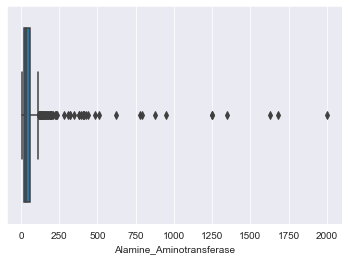

In [31]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase);

Será que  os valores exremos são mesmo outliers?

In [32]:
# Contagem de Frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending=False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

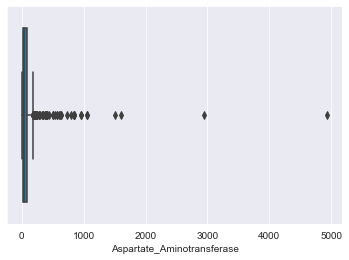

In [33]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [34]:
# Contagem de Frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [35]:
# Matém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

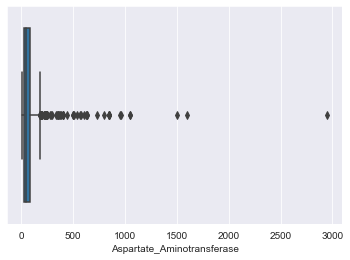

In [36]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [37]:
# Contagem de Frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [38]:
# Matém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [39]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [40]:
dados.isnull().values.any()

True

In [41]:
# Verifica quantas colunas tem valores ausentes.
dados.isnull().values.any().sum()

1

In [42]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [43]:
dados.shape

(568, 11)

In [44]:
# Drop dos registros com valores ausentes em qualquer coluna (any) pois como só temos 4 registros não há porque tratar, pois a quantidade é muito pequena.
dados = dados.dropna(how = 'any')

In [45]:
dados.shape

(564, 11)

In [46]:
# Listar valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [47]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
370,54,1,22.6,11.4,558,30,37,7.8,3.4,0.8,1
184,64,0,1.1,0.4,201,18,19,6.9,4.1,1.4,1
211,42,0,2.7,1.3,219,60,180,7.0,3.2,0.8,1
505,32,0,32.6,14.1,219,95,235,5.8,3.1,1.1,1
177,75,0,14.8,9.0,1020,71,42,5.3,2.2,0.7,1


## Pré-Processamento de Dados para construção do Modelo de Machine Learning

In [48]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [49]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [50]:
# Cria um objeto separado para a variável target
y = dados.Target

In [51]:
# Cria um objeto Separado para as variáveis de entrada
X = dados.drop('Target', axis=1)

In [52]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 1234, stratify = dados.Target)

In [53]:
len(X_treino)

423

In [54]:
len(X_teste)

141

In [55]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [56]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,37,0,0.8,147,27,46,5.0,2.5,1.0
448,48,1,0.8,142,26,25,6.0,2.6,0.7
509,46,0,20.0,254,140,540,5.4,3.0,1.2
415,70,0,1.3,690,93,40,3.6,2.7,0.7
56,33,0,0.8,198,26,23,8.0,4.0,1.0


### Balanceamento de Classes

In [57]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [58]:
# Instalar o pacote
!pip install -q imblearn

In [59]:
# Caregando a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [60]:
# Aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

**Explique por que o balanceamento de classe é feito somente com os dados de treino**

Porque é neste momento que se faz necessário uma melhor distribuição dos dados em torno da target para evitar que o modelo aprenda a reconhecer mais um padrão que o outro.

In [61]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [62]:
len(X_res)

602

In [63]:
len(y_res)

602

In [64]:
# Ajustar o nome do dataset de treino para X
X_treino = X_res

In [65]:
# Ajustar o nome do dataset de treino para Y
y_treino = y_res

### Padronização dos Dados

In [66]:
# Calculamos a média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print()
print(treino_std)

Age                            43.337209
Gender                          0.217608
Total_Bilirubin                 2.664689
Alkaline_Phosphotase          265.094684
Alamine_Aminotransferase       62.863787
Aspartate_Aminotransferase     77.883721
Total_Protiens                  6.516489
Albumin                         3.241286
Albumin_and_Globulin_Ratio      0.996339
dtype: float64

Age                            16.141664
Gender                          0.412963
Total_Bilirubin                 5.564917
Alkaline_Phosphotase          221.102741
Alamine_Aminotransferase      139.935954
Aspartate_Aminotransferase    144.045506
Total_Protiens                  1.028996
Albumin                         0.763107
Albumin_and_Globulin_Ratio      0.306736
dtype: float64


In [67]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [68]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.103012,-0.526944,-0.029594,-0.461752,-0.249141,-0.387959,1.052979,0.994243,0.337949
1,1.775702,-0.526944,-0.335079,-0.529594,-0.284872,-0.297710,-0.501935,-0.316189,0.011935
2,-1.569678,-0.526944,-0.335079,0.076459,0.065289,0.431227,-0.987846,-0.971405,-0.640092
3,-0.082842,-0.526944,1.120468,0.031231,-0.227703,-0.117211,-0.696300,-1.626621,-1.618132
4,-0.082842,-0.526944,-0.335079,-0.624572,-0.241995,-0.332421,-1.570939,-0.709318,0.663962


In [69]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,-9.442428e-17,-7.081821e-17,-4.721214e-17,7.671973e-17,-2.360607e-17,1.180304e-17,5.090059e-16,1.770455e-17,-2.478637e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.436998e+00,-5.269437e-01,-4.069583e-01,-9.140307e-01,-3.777713e-01,-4.712658e-01,-3.708946e+00,-3.068096e+00,-2.270159e+00
25%,-7.023569e-01,-5.269437e-01,-3.427487e-01,-4.300927e-01,-2.848717e-01,-3.740743e-01,-6.528606e-01,-7.093182e-01,-6.400916e-01
50%,1.030123e-01,-5.269437e-01,-3.171097e-01,-3.125004e-01,-2.205565e-01,-2.907673e-01,8.115749e-02,-7.660632e-04,1.193540e-02
75%,7.225272e-01,-5.269437e-01,-1.405305e-01,4.140752e-02,-7.763400e-02,-6.861527e-02,6.642503e-01,8.135406e-01,5.378325e-01
max,2.890829e+00,1.894584e+00,1.299845e+01,8.344109e+00,1.155626e+01,1.056691e+01,2.996622e+00,2.959891e+00,5.880179e+00


In [70]:
# Usamos méia e desvio de trenio para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

**Explique porque usamos média e desvio dos dados de treino para padronizar os dados de teste.**

Porque de outra forma não teríamos os dados no mesmo padrão e escala.

In [71]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.392600,-0.526944,-0.335079,-0.534117,-0.256287,-0.221345,-1.473757,-0.971405,0.011935
448,0.288867,1.894584,-0.335079,-0.556731,-0.263433,-0.367132,-0.501935,-0.840361,-0.966105
509,0.164964,-0.526944,3.115107,-0.050179,0.551225,3.208127,-1.085028,-0.316189,0.663962
415,1.651799,-0.526944,-0.245231,1.921755,0.215357,-0.262998,-2.834307,-0.709318,-0.966105
56,-0.640405,-0.526944,-0.335079,-0.303455,-0.263433,-0.381017,1.441707,0.994243,0.011935


### Construção, Treinamento e Avaliaçaõ do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogistcRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [72]:
# Define lista de hiperparâmetros
tuned_params_v1 = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2']
}

In [73]:
# Criaremos o modelo com GridSearch
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [74]:
# Treinando o modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [75]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=1)

In [76]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [77]:
# Mostrar as 10 primeiras previsões
y_pred_v1[: 10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [78]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [79]:
# Mostrar as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.63125807e-01, 2.36874193e-01],
       [5.23941663e-01, 4.76058337e-01],
       [1.35918854e-04, 9.99864081e-01],
       [6.30467071e-01, 3.69532929e-01],
       [6.63928954e-01, 3.36071046e-01],
       [5.97741609e-01, 4.02258391e-01],
       [7.58655868e-01, 2.41344132e-01],
       [7.42115454e-02, 9.25788455e-01],
       [6.04949565e-01, 3.95050435e-01],
       [7.88097951e-03, 9.92119020e-01]])

In [80]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcular a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [81]:
# Mostrar as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.23687419, 0.47605834, 0.99986408, 0.36953293, 0.33607105,
       0.40225839, 0.24134413, 0.92578845, 0.39505043, 0.99211902])

In [82]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16
print('Para o ponto de dado {}, classse real = {}, classe prevista = {}, probabilidade prevista = {}'.format(i, y_teste.iloc[i], 
                                                                                                             y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classse real = 1, classe prevista = 1, probabilidade prevista = 0.7859692457466756


In [83]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [41, 60]], dtype=int64)

In [84]:
# Extraindo cada valor da Confusion Matriz (tn=True Negative, fp=False Positive, fn=False Negative, tp=True Positive)
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [85]:
print(tn, fp, fn, tp)

32 8 41 60


In [86]:
# Calcular a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)

In [87]:
print(roc_auc_v1)

0.6970297029702972


In [88]:
# Calcular a curva ROC com dados e previsão em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [89]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7396039603960396


In [90]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6524822695035462


### Feature Importance

In [91]:
# Construindo o modelo novamente com os melhores hiperparametros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C=10)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=10)

In [92]:
# Obtemos os coeficientes pelo maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0, :]))

In [93]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*"-")
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Albumin
Total_Protiens
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alkaline_Phosphotase
Age
Gender


In [94]:
# Salvar o modelo em disco
with open('./modelo/modelo_v1.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v1, './modelo/modelo_v1.pkl')

In [95]:
# Criar um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [96]:
# Dicionário com as métricas do modelo v1
dict_modelo_v1 = {
    'Nome': 'modelo_v1',
    'Algoritmo': 'Regressão Logística',
    'ROC_AUC Score': roc_auc_v1,
    'AUC Score': auc_v1,
    'Acurácia': acuracia_v1}

In [97]:
# Adicionar o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [98]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.69703,0.739604,0.652482


A acurácia não é a melhor métrica para comparar o resultado de modelos diferentes, o ideal, nestes casos, é utilizar o AUC Score.

### Construção, Treino e Avaliaçaõ do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a Versão 1. Vamos usar o Random Forest

In [99]:
# Grid de Hiperparâmetros
tuned_params_v2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [100]:
# Criar o modelo com RandomizedSearchCV para buscar a melhor combinação de Hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [101]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [102]:
# Extrair o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=400)

In [103]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [104]:
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:, 1]

In [105]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[18, 22],
       [19, 82]], dtype=int64)

In [106]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.630940594059406


In [107]:
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [108]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.728960396039604


In [109]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.7092198581560284


### Feature Importance

In [110]:
# Recriar o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [111]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2: ")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2: 
--------------------------------------------------
Alkaline_Phosphotase
Total_Bilirubin
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Age
Total_Protiens
Albumin
Gender


In [112]:
# Salvar o modelo em disco
with open('./modelo/modelo_v2.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2, './modelo/modelo_v2.pkl')

In [113]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {
    'Nome': 'modelo_v2', 
    'Algoritmo': 'Random Forest', 
    'ROC_AUC Score': roc_auc_v2, 
    'AUC Score': auc_v2, 
    'Acurácia': acuracia_v2
}

In [114]:
# Adicionar o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [115]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.739604,0.652482
1,modelo_v2,Random Forest,0.630941,0.728960,0.709220


### Construção, Treino e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de k, que é o número de vizinhos mais próximos.

In [116]:
# Lista de possíveis valores de k
vizinhos = list(range(1, 20, 2))

In [117]:
# Lista para os scores
cv_scores = []

In [118]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [119]:
# Ajustando o erro de classificação
erro  = [1 - x for x in cv_scores]

In [120]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [121]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [122]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [123]:
# Previsão
y_pred_v3 = modelo_v3.predict(X_teste)

In [124]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v3)

array([[17, 23],
       [39, 62]], dtype=int64)

In [125]:
# Previsão de probabilidade de classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]

In [126]:
# Calculando ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.519430693069307


In [127]:
# Calculando curva ROC
fpr_v3, tpr_v3, threshold = roc_curve(y_teste, y_pred_proba_v3)

In [128]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.519430693069307


In [129]:
# Acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)

Obs: Como o algoritmo KNN não extraimos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [130]:
# Salvar o modelo em disco
with open('./modelo/modelo_v3.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v3, './modelo/modelo_v3.pkl')

In [131]:
# Dicionário com as metrícas do modelo_v3
dict_modelo_v3 = {
    'Nome': 'modelo_v3',
    'Algoritmo': 'KNN',
    'ROC_AUC Score': roc_auc_v3, 
    'AUC Score': auc_v3, 
    'Acurácia': acuracia_v3
}

In [132]:
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [133]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.739604,0.652482
1,modelo_v2,Random Forest,0.630941,0.728960,0.709220
2,modelo_v3,KNN,0.519431,0.519431,0.560284


### Construção, Treino e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [134]:
# Hiperparâmetros
tuned_params_v4 = {
    'min_samples_split': [2, 3, 4, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4, 6],
    'max_depth': [2, 3, 4, 5, 6, 7]
}

In [135]:
# Criar o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [136]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [137]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

In [138]:
# Previsões de classes
y_pred_v4 = modelo_v4.predict(X_teste)

In [140]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:, 1]

In [141]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v4)

array([[26, 14],
       [45, 56]], dtype=int64)

In [142]:
# Calcula ROC AUC Score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6022277227722772


In [143]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [144]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6741336633663365


In [145]:
# Cálculo de Acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.5815602836879432


### Feature Importance

In [146]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [147]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Total_Protiens
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Albumin
Age
Gender
Aspartate_Aminotransferase


In [148]:
# Salvando o modelo em disco
with open('./modelo/modelo_v4.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v4, './modelo/modelo_v4.pkl')

In [150]:
# Dicionário com as metrícas do modelo_v4
dict_modelo_v4 = {
    'Nome': 'modelo_v4',
    'Algoritmo': 'Decision Tree',
    'ROC_AUC Score': roc_auc_v4, 
    'AUC Score': auc_v4, 
    'Acurácia': acuracia_v4
}

In [152]:
# Adicionar o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [154]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.739604,0.652482
1,modelo_v2,Random Forest,0.630941,0.728960,0.709220
2,modelo_v3,KNN,0.519431,0.519431,0.560284
3,modelo_v4,Decision Tree,0.602228,0.674134,0.581560


### Construçaõ, Treinamento e Avaliaçaõ do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM

In [159]:
# Função para seleção de hiperparâmetros
def svc_params_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_


In [160]:
# Aplicando a função
svc_params_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [161]:
# Criando o modelo com os melhore hiperparâmetros
modelo_v5 = SVC(C=1, gamma=1, probability = True)

In [162]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [165]:
# Previsões de classes
y_pred_v5 = modelo_v5.predict(X_teste)

In [167]:
confusion_matrix(y_teste, y_pred_v5)

array([[15, 25],
       [31, 70]], dtype=int64)

In [168]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [169]:
# Calculando ROC AUC Score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5340346534653465


In [170]:
# Calculando curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [171]:
# Calcula AUC Score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6215346534653465


In [174]:
# Calculando a acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6028368794326241


In [175]:
# Salvando o modelo em disco
with open('./modelo/modelo_v5.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v5, './modelo/modelo_v5.pkl')

In [176]:
# Dicionário com as metrícas do modelo_v4
dict_modelo_v5 = {
    'Nome': 'modelo_v5',
    'Algoritmo': 'SVM',
    'ROC_AUC Score': roc_auc_v5, 
    'AUC Score': auc_v5, 
    'Acurácia': acuracia_v5
}

In [177]:
# Adicionando o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index=True)

In [178]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.739604,0.652482
1,modelo_v2,Random Forest,0.630941,0.728960,0.709220
2,modelo_v3,KNN,0.519431,0.519431,0.560284
3,modelo_v4,Decision Tree,0.602228,0.674134,0.581560
4,modelo_v5,SVM,0.534035,0.621535,0.602837


### Seleção do Melhor Modelo

In [180]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global.
# O Score AUC é o ideal para compara modelos de diferentes algoritmos.
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [181]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.69703,0.739604,0.652482


### Previsões com o Melhor Modelo Treinado

In [183]:
# Obtendo o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v1'

In [186]:
# Carregamos o melhor modelo no disco
melhor_modelo = joblib.load('./modelo/' + modelo + '.pkl')
melhor_modelo

LogisticRegression(C=10)

In [187]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [188]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [189]:
# Converter o objeto para array
arr_paciente = np.array(novo_paciente)

In [190]:
# Usamos méida e desvio padrão de treino para padronizar novos dados.
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [191]:
# Converter o objeto para array
arr_paciente = np.array(arr_paciente)

In [192]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.77570233,  1.8945837 , -0.33507942, -0.3577282 , -0.34204067,
       -0.33936304,  0.56706817,  0.20798423, -0.08586865])

In [195]:
# Previsões de classes (por que a linha abaixo apresenta erro?
#pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [196]:
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [197]:
# Verificando o valor e imprimir o resultado final.
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática')
else:
    print('Este paciente não deve apresentar doença hepática')

Este paciente deve apresentar doença hepática
